# Scatter Plots 

Scatter plots are used in statistics to visualize the relationship between two numerical variables. Each point in a scatter plot represents an individual record or observation from the dataset, plotted against each other, one on the x-axis and the other on the y-axis. Scatter plots help us understand if there is a correlation between two variables; it could be positive, negative, or no correlation.

Scatter plots can also reveal the presence of distinct groups or clusters within the data, which might indicate that the data points within each cluster share some common characteristics. They can also detect outliers or data points that significantly deviate from the overall pattern of the data. 

## Create a Scatter plot

To create a Scatter plot in matplotlib, use the [`plt.scatter()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) function. Let's read the Penguin dataset; We will look at the relationship between `flipper_length_mm` and `body_mass_g.`

In [1]:
# silence warnings
import warnings

warnings.filterwarnings("ignore")

# import pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# read data
df = pd.read_csv("../data/penguins.csv")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


We can see there are some missing values; let's drop them.

In [2]:
# drop missing values
df.dropna(inplace=True)

We will plot the `flipper_length_mm` on the x-axis and `body_mass_g` on the y-axis. 

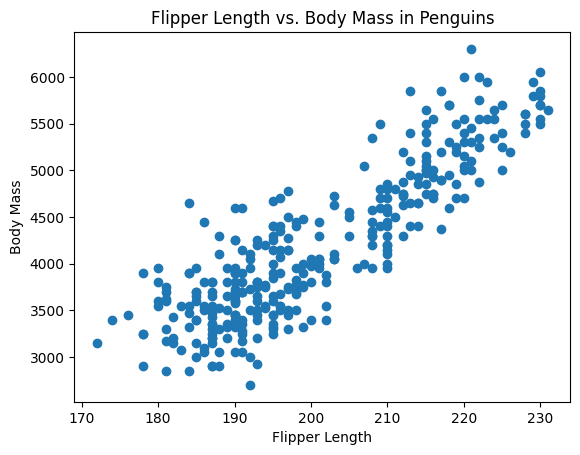

In [3]:
# create a scatter plot
plt.scatter(df["flipper_length_mm"], df["body_mass_g"])
plt.title("Flipper Length vs. Body Mass in Penguins")
plt.xlabel("Flipper Length")
plt.ylabel("Body Mass")
plt.savefig("../images/scatter02.png")
plt.show()

Looking at the graph, I feel these variables have a positive correlation. On average, penguins with longer flippers weigh more than penguins with shorter flippers.

## Marker style

To change the marker style of the scatter plot, use the `marker` parameter. There are various marker styles available in matplotlib, which you can find here - [marker styles](https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers)

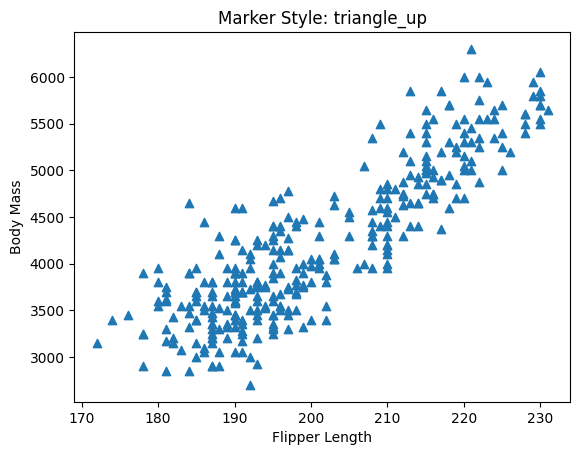

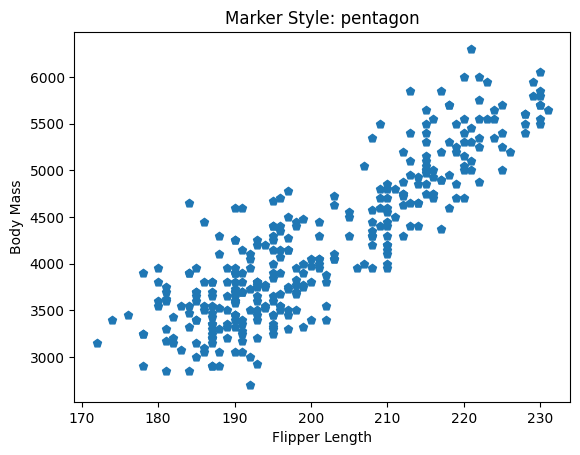

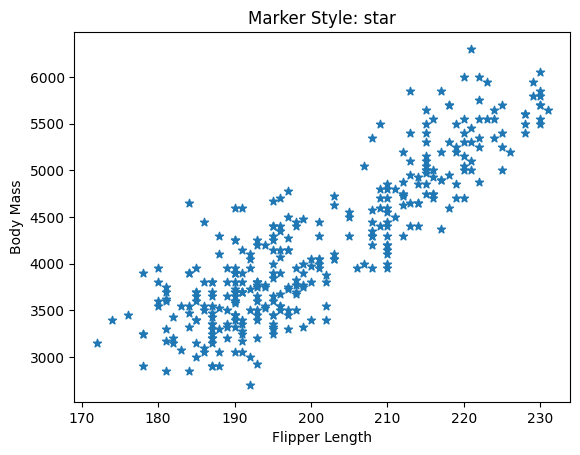

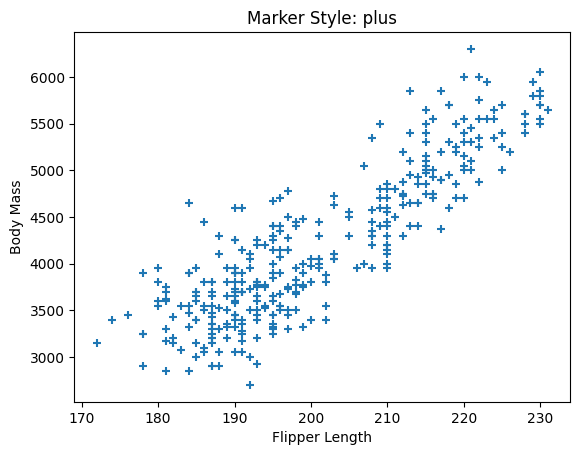

In [4]:
# scatter plots with different marker style
styles = ["^", "p", "*", "+"]
descriptions = ["triangle_up", "pentagon", "star", "plus"]

for style, desc in zip(styles, descriptions):
    plt.scatter(df["flipper_length_mm"], df["body_mass_g"], marker=style)
    plt.title(f"Marker Style: {desc}")
    plt.xlabel("Flipper Length")
    plt.ylabel("Body Mass")
    plt.show()

If you look carefully, you will see that I called the `plt.show()` function inside the for loop's body because I wanted to create a separate plot for each marker type. If you specify the show function outside of the loop, then each marker type will be plotted on the same figure. Go ahead and give it a try. 

## Marker color


Use the `c` or `color` parameters to change the marker color. 

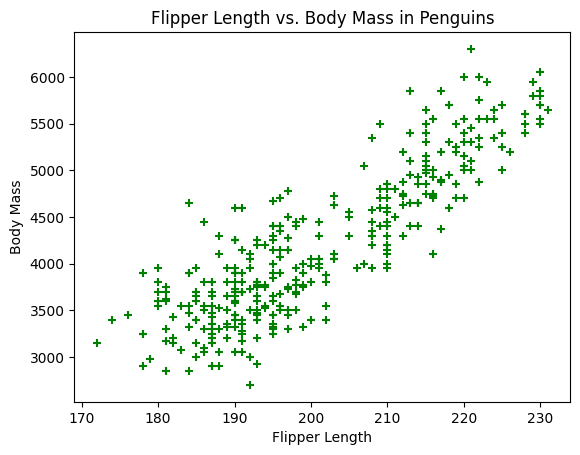

In [9]:
# scatter plot with custom color
plt.scatter(df["flipper_length_mm"], df["body_mass_g"], c="green", marker="+")
plt.title("Flipper Length vs. Body Mass in Penguins")
plt.xlabel("Flipper Length")
plt.ylabel("Body Mass")
plt.savefig("../images/scatter07.png")
plt.show()

## Marker size

The `s` parameter controls the size of the markers on a scatter plot. You can specify `s` as a single number or as an array of sizes to give each data point a different size. This is useful for adding an additional dimension to a two-dimensional scatter plot,as we do in bubble charts.

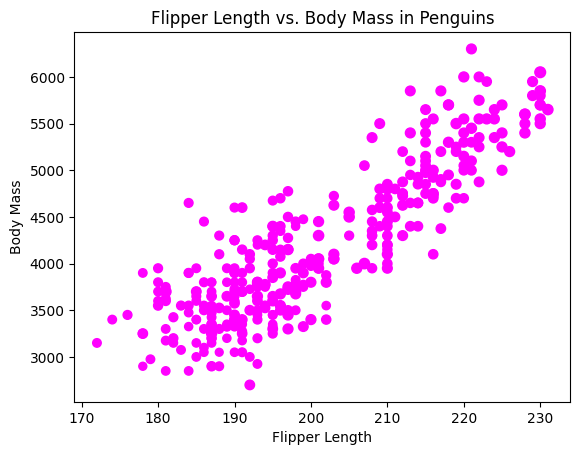

In [11]:
# scatter plot with different marker size
plt.scatter(
    df["flipper_length_mm"], df["body_mass_g"], c="magenta", s=df["bill_length_mm"]
)
plt.title("Flipper Length vs. Body Mass in Penguins")
plt.xlabel("Flipper Length")
plt.ylabel("Body Mass")
plt.savefig("../images/scatter08.png")
plt.show()

## Colorbar

We can also color the markers according to their size. For this, we have to first set the `c` with the variable that specifies the size and then use the `cmap` to map the data to colors and at last use the [plt.colorbar()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html) function to show the color bar on the plot. Use `label` to add a label to the color bar. You can find various options for `cmap` here - [cmap options](https://matplotlib.org/stable/users/explain/colors/colormaps.html)

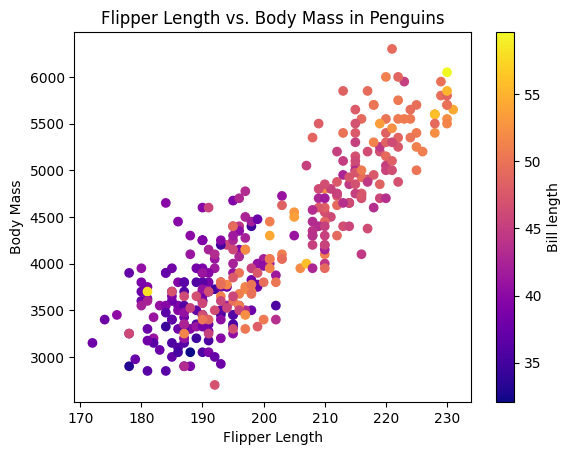

In [12]:
# scatter plot with a colorbar
plt.scatter(
    df["flipper_length_mm"], df["body_mass_g"], c=df["bill_length_mm"], cmap="plasma"
)
plt.title("Flipper Length vs. Body Mass in Penguins")
plt.xlabel("Flipper Length")
plt.ylabel("Body Mass")
plt.colorbar(label="Bill length")
plt.savefig("../images/scatter09.png")
plt.show()

## Scatter plot with legend

To create a Scatter plot with a legend, add a `label` to the plot and then add a `plt.legend()` function. Adding a label and a legend will help us identify different classes or groups within a dataset. For example, we can see how the Body mass and flipper length change based on the type of penguin species. 

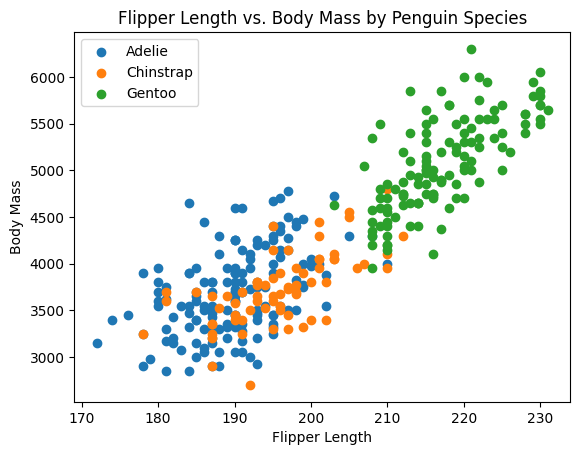

In [13]:
# get unique species
unique_species = df["species"].unique()

# create scatter plot for each species
for species in unique_species:
    df_species = df[df["species"] == species]
    plt.scatter(
        df_species["flipper_length_mm"], df_species["body_mass_g"], label=species
    )

plt.title("Flipper Length vs. Body Mass by Penguin Species")
plt.xlabel("Flipper Length")
plt.ylabel("Body Mass")
plt.legend()
plt.savefig("../images/scatter10.png")
plt.show()

 This plot shows `Gentoo` species tend to have considerably longer flipper lengths and higher body masses than `Adelie` and `Chinstrap` species.

## Transparent markers

The `alpha` controls the transparency level of the markers in the scatter plot. The `alpha` value ranges from 0 to 1, where 0 is fully transparent (the markers are invisible) and 1 is fully opaque (the markers are completely solid). This is handy in scatter plots with many overlapping points.

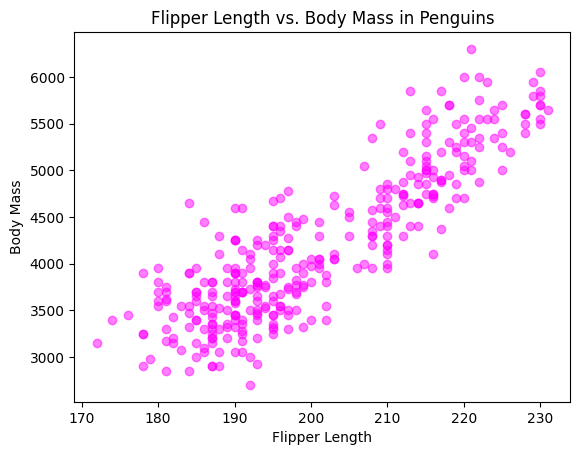

In [14]:
# scatter plot with alpha 
plt.scatter(df["flipper_length_mm"], df["body_mass_g"], c="magenta", alpha=0.5)
plt.title("Flipper Length vs. Body Mass in Penguins")
plt.xlabel("Flipper Length")
plt.ylabel("Body Mass")
plt.savefig("../images/scatter11.png")
plt.show()

# Correlation with Scatter Plots 

The Pearson Correlation Coefficient is a statistical measure that shows the extent to which two variables change together. Its values lie from `-1 to +1`. 

`+1` indicates a perfect positive linear relationship, which means when one variable increases, the other variable also increases, and when one variable decreases the other variable also decreases.

`-1` indicates a perfect negative linear relationship, which means when one variable increases, the other variable decreases.

`0`  indicates no linear relationship which means when one variable increases, there is no consistent pattern of increase or decrease in the other variable.


Let's try to understand this visually using a scatter plot. We will create synthetic data to demonstrate this.  

In [7]:
# import numpy library
import numpy as np

# function for creating synthetic data
def generate_synthetic_data(correlation, n_samples=100, seed=None):
    if seed is not None:
        np.random.seed(seed)
    x = np.random.normal(0, 1, n_samples)
    y = x * correlation + np.random.normal(0, np.sqrt(1 - correlation**2), n_samples)
    return x, y

Next, we will define the number of samples and the range of correlation values. We will create multiple subplots in a single row using the [`plt.subplots()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) function. We will learn more about subplots in later chapters in great detail. We will also use `plt.tight_layout()` function which makes sure that the titles, axes, and labels of two subplots do not overlap and the overall layout looks clean.

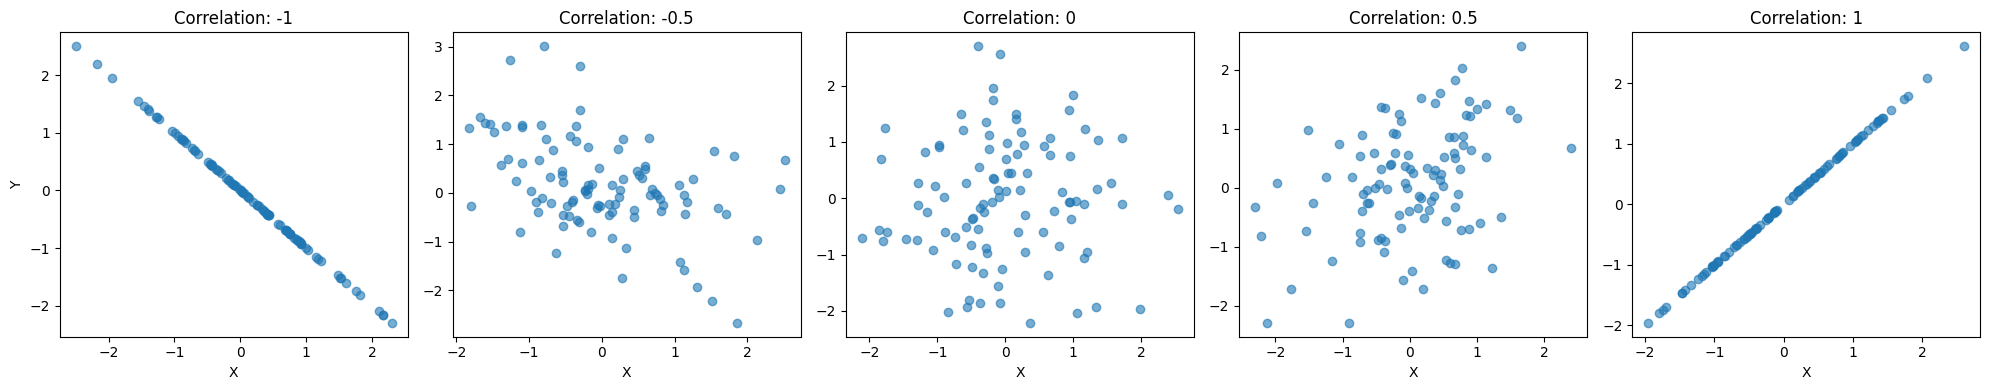

In [11]:
# Define the number of samples and correlations
n_samples = 100
correlations = [-1, -0.5, 0, 0.5, 1]

# Total number of plots
total_plots = len(correlations)

# Create a figure to hold all subplots
plt.figure(figsize=(total_plots * 4, 4))  # Adjust the size as needed

for i, correlation in enumerate(correlations):
    # Position each subplot in the ith position in a 1-row grid
    plt.subplot(1, total_plots, i + 1)
    x, y = generate_synthetic_data(correlation, n_samples)
    plt.scatter(x, y, alpha=0.6)
    plt.title(f'Correlation: {correlation}')
    plt.xlabel('X')
    if i == 0:
        plt.ylabel('Y')  # Only add y label to the first plot for clarity

plt.tight_layout()
plt.savefig("../images/scatter12.png")
plt.show()

Looking at the above plot, we can see that When the correlation is `-1` or `+1` the scatter plot tend to be much narrower which means that if we are given the measurement on the x-axis, we can predict the measurement on the y-axis with good precision. But when the correlation is `0` or near around it, the scatter plot tends to get wider which means the measurement on the y-axis is less predictable.

## Exercises 3.1

1. Read the `tips.csv` data in pandas.
2. Create a Scatter plot with `total_bill` on the x-axis and `tip` on the y-axis.
3. Change the marker style to `tri_down` or your other choice.
4. Change the marker color to `magenta` or your favorite color.
5. Add a color bar using the `size` column, i.e. number of people at the party.
6. Create a scatter plot with a legend using the `sex` column.

## Summary

* Scatter plots are used to visualize the relationship between two variables.
* To create a Scatter plot in matplotlib, use the `plt.scatter()` function.
* Marker styles can be changed with the `marker`.
* Marker color can be changed with `c` or `color`.
* The `s` change the marker size.
* To add a color bar, define `c` and `cmap`, then add `plt.colorbar()`.
* To add a legend, use the `label` and `plt.legend()`.

## Solution 

## Exercise 3.1

In [13]:
# Read tips.csv data in a pandas
df = pd.read_csv("../data/tips.csv")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


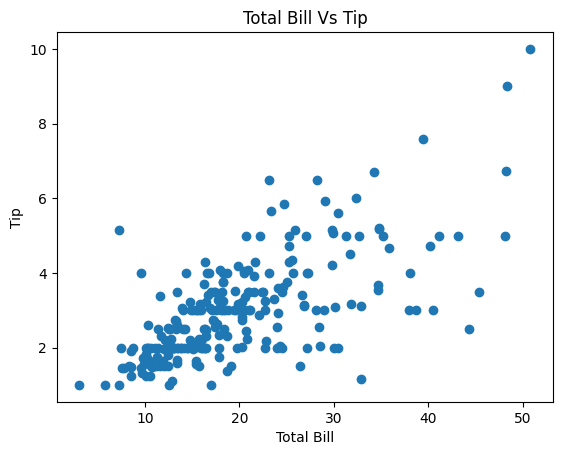

In [16]:
# Read tips data in a pandas
df = pd.read_csv("../data/tips.csv")

# Create a Scatter plot
plt.scatter(df["total_bill"], df["tip"])
plt.title("Total Bill Vs Tip")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.savefig("../images/scatter14.png")
plt.show()

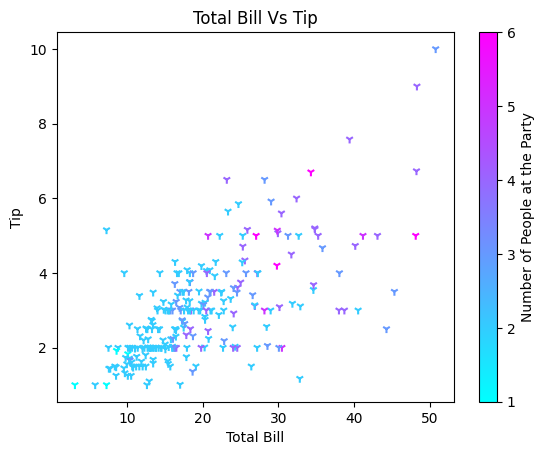

In [17]:
# custom marker style, color and colorbar
plt.scatter(df["total_bill"], df["tip"], c=df["size"], marker="1", cmap="cool")
plt.title("Total Bill Vs Tip")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.colorbar(label="Number of People at the Party")
plt.savefig("../images/scatter15.png")
plt.show()

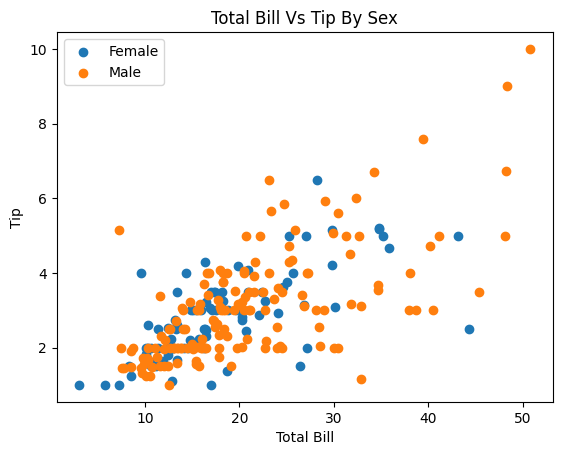

In [18]:
# Create a scatter plot with a legend
sex_types = df["sex"].unique()

for sex in sex_types:
    df_sex = df[df["sex"] == sex]
    plt.scatter(df_sex["total_bill"], df_sex["tip"], label=sex)

plt.title("Total Bill Vs Tip By Sex")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.legend()
plt.savefig("../images/scatter16.png")
plt.show()